In [1]:
# Import the modules

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 

# hypothesis testing 
from scipy.stats import shapiro 
import scipy.stats as stats 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)

pd.set_option('display.max_columns',None)

In [2]:
# load the data

path='data/cookie_cats.csv'

def load(path, info=True):
    if len(path.split(".csv")) > 1:
        read=pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1:
        read_pd.read_excel(path)
        
    if info:
        if len(read) > 0:
            print(">> Data Imported!\n----------------------\n")
            
            print(">> Dimentions:")
            
            print("~ observation:",read.shape[0], "column:",read.shape[1], "\n")
            print("----------------------------------")
            
            print(">> Dtypes: ")
            if len(read.select_dtypes("object").columns) > 0:
                print("~ object variables: ", len(read.select_dtypes("object").columns),"\n",
                     read.select_dtypes("object").columns.tolist(), "\n")
            
            if len(read.select_dtypes("integer").columns) > 0:
                print("~ integer variables: ", len(read.select_dtypes("integer").columns),"\n",
                     read.select_dtypes("integer").columns.tolist(), "\n")
            
            if len(read.select_dtypes("float").columns) > 0:
                print("~ float variables: ", len(read.select_dtypes("float").columns),"\n",
                     read.select_dtypes("float").columns.tolist(), "\n")
                
            if len(read.select_dtypes("bool").columns) > 0:
                print("~ bool variables: ", len(read.select_dtypes("bool").columns),"\n",
                     read.select_dtypes("bool").columns.tolist(), "\n")
            print("-------------------------------------")
            
            
            print(">> Missing Value")
            print(np.where(read.isnull().values.any()==False, "No missing Values!", "Data includes missing value!"),"\n")
            print("-------------------------------------") 
            
    else:
        print("data did not import !")
    
    return read


In [3]:
ab=load(path, info=True)
ab.head()

>> Data Imported!
----------------------

>> Dimentions:
~ observation: 90189 column: 5 

----------------------------------
>> Dtypes: 
~ object variables:  1 
 ['version'] 

~ integer variables:  2 
 ['userid', 'sum_gamerounds'] 

~ bool variables:  2 
 ['retention_1', 'retention_7'] 

-------------------------------------
>> Missing Value
No missing Values! 

-------------------------------------


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
# summary stats 

print(ab.userid.nunique()==ab.shape[0])

ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0,51.872457,195.050858,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,49854.0


In [5]:
# A/B groups and target summary stats

ab.groupby("version").sum_gamerounds.agg(['count', 'median', 'mean', 'std', 'max'])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


Text(0.5, 1.0, 'Distribution of gate_30 & gate_40')

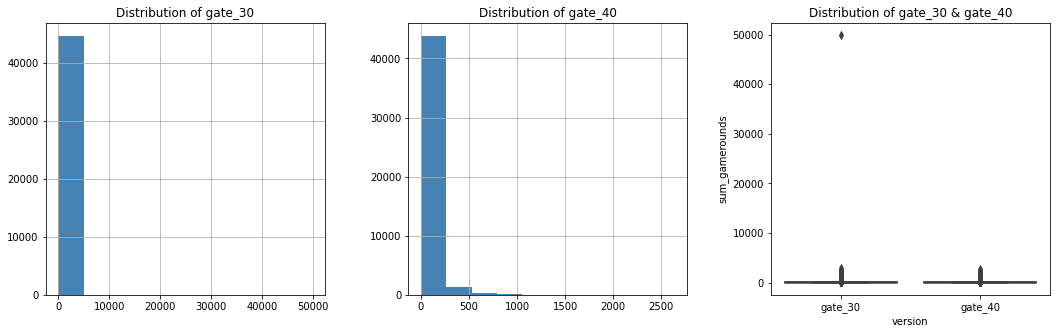

In [6]:
fig, axes = plt.subplots(1,3,figsize=(18,5)) 

ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = ab.version, y = ab.sum_gamerounds, ax = axes[2])

axes[0].set_title("Distribution of gate_30")
axes[1].set_title("Distribution of gate_40")
axes[2].set_title("Distribution of gate_30 & gate_40")


<AxesSubplot:xlabel='index'>

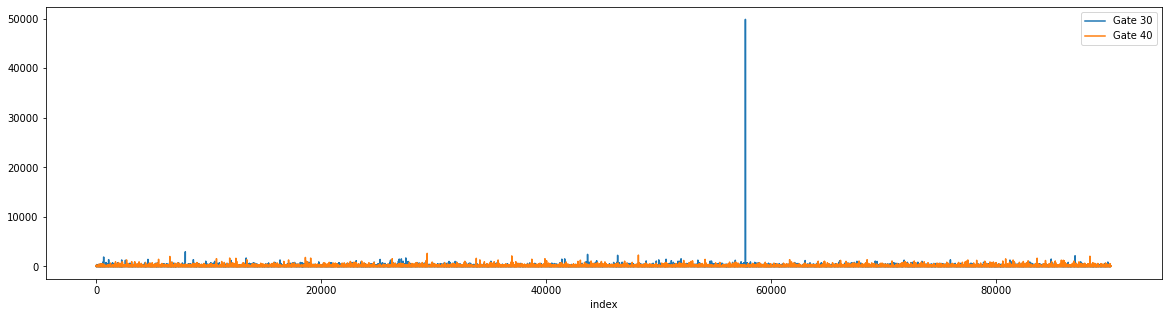

In [7]:
ab[ab.version=="gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20,5))
ab[ab.version=="gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 40", figsize=(20,5))


In [8]:
# after removing outlier

In [9]:
ab=ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


Text(0.5, 1.0, 'Distribution of gate_30 & gate_40')

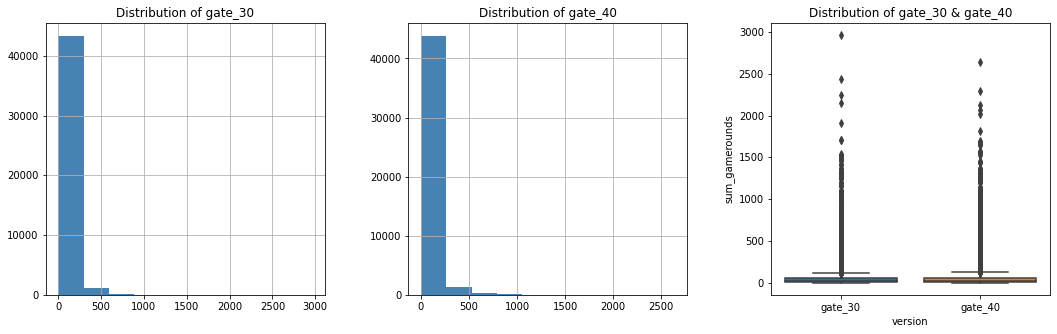

In [10]:
fig, axes = plt.subplots(1,3,figsize=(18,5)) 

ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = ab.version, y = ab.sum_gamerounds, ax = axes[2])

axes[0].set_title("Distribution of gate_30")
axes[1].set_title("Distribution of gate_40")
axes[2].set_title("Distribution of gate_30 & gate_40")

<AxesSubplot:xlabel='index'>

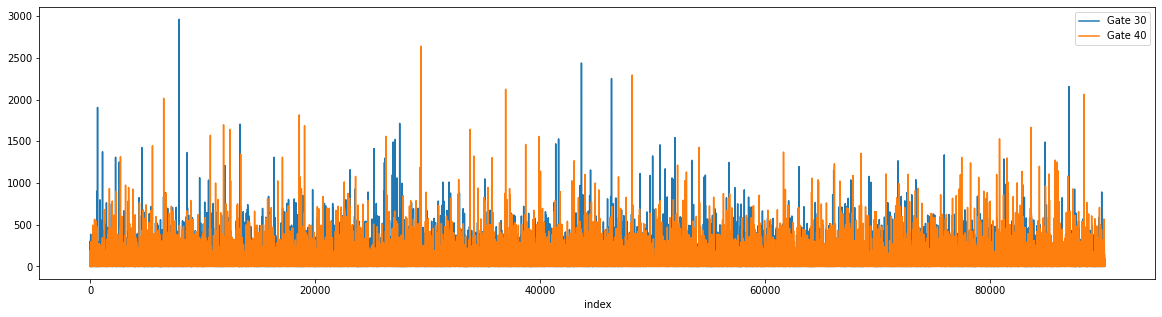

In [11]:
ab[ab.version=="gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 30", figsize=(20,5))
ab[ab.version=="gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend=True, label="Gate 40", figsize=(20,5))


In [12]:
# players installed the game but haven't played the game. 
ab.groupby("sum_gamerounds").userid.count()[0]

3994

Text(0.5, 0.98, 'The no of users in the gme rounds played ')

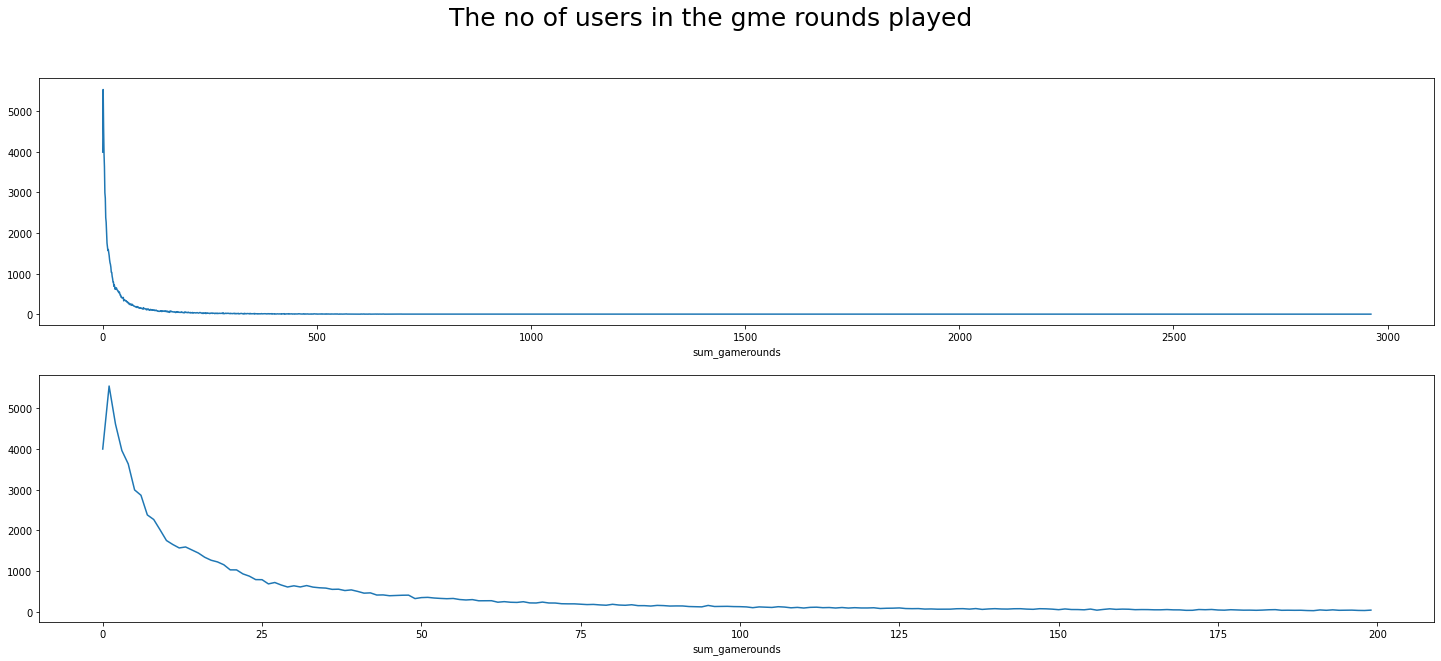

In [13]:
fig, axes = plt.subplots(2, 1, figsize = (25,10))
ab.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
ab.groupby("sum_gamerounds").userid.count()[:200].plot(ax = axes[1])
plt.suptitle("The no of users in the gme rounds played ", fontsize=25)

In [14]:
# from the first graph we can see that 3994 users never played the gme 
# the number of users decrease as the level increses

In [15]:
ab.groupby("sum_gamerounds").userid.count().reset_index().head(20)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [16]:
# users reached gate 30 and 40 
ab.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [17]:
# 642 users reached level 30 and 505 users reached level 40 

In [18]:
# A/B Groups & Target Summary Stats
ab.groupby("version").sum_gamerounds.agg(['count', 'median','mean','std','max'])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0,51.342111,102.057598,2961
gate_40,45489,16.0,51.298776,103.294416,2640


In [19]:
#retention_1 - did the player come back and play 1 day after installing?
#retention_7 - did the player come back and play 7 days after installing? 

pd.DataFrame({"Ret1_count": ab['retention_1'].value_counts(),
              "Ret7_count": ab['retention_7'].value_counts(),
              "Ret1_ratio": ab['retention_1'].value_counts()/len(ab),
              "Ret7_ratio": ab['retention_7'].value_counts()/len(ab)})

,Ret1_count,Ret7_count,Ret1_ratio,Ret7_ratio
False,50035,73408,0.554786,0.813944
True,40153,16780,0.445214,0.186056


In [20]:
# after day1 55% of the player stopped playing. 
# afte day 7 81% of the player sropped playing.

In [21]:
# summary statistics of retention variables by version 
ab.groupby(['version','retention_1']).sum_gamerounds.agg(['count','median','mean','std','max'])

count  median       mean         std   max
version retention_1                                            
gate_30 False        24665     6.0  16.359092   36.528426  1072
        True         20034    48.0  94.411700  135.037697  2961
gate_40 False        25370     6.0  16.340402   35.925756  1241
        True         20119    49.0  95.381182  137.887256  2640

In [22]:
ab.groupby(['version','retention_7']).sum_gamerounds.agg(['count','median','mean','std','max'])

count  median        mean         std   max
version retention_7                                             
gate_30 False        36198    11.0   25.796508   43.316158   981
        True          8501   105.0  160.117516  179.358560  2961
gate_40 False        37210    11.0   25.856356   44.406112  2640
        True          8279   111.0  165.649837  183.792499  2294

In [23]:
ab['Retention']=np.where((ab.retention_1==True) & (ab.retention_7==True),1,0)
ab.groupby(['version','Retention']).sum_gamerounds.agg(['count','median','mean','std','max'])

count  median        mean         std   max
version Retention                                             
gate_30 0          38023    12.0   28.070273   48.017452  1072
        1           6676   127.0  183.886309  189.626390  2961
gate_40 0          38983    12.0   28.103353   48.927850  2640
        1           6506   133.0  190.282355  194.220077  2294

In [24]:
ab['newRetention']=list(map(lambda x,y: str(x)+" - "+str(y), ab.retention_1, ab.retention_7))
ab.groupby(['version','newRetention']).sum_gamerounds.agg(['count','median','mean','std','max'])

count  median        mean         std   max
version newRetention                                              
gate_30 False - False  22840     6.0   11.819746   21.642643   981
        False - True    1825    43.0   73.169315   93.222330  1072
        True - False   13358    33.0   49.694490   58.125396   918
        True - True     6676   127.0  183.886309  189.626390  2961
gate_40 False - False  23597     6.0   11.913294   20.901020   547
        False - True    1773    47.0   75.261139   94.478048  1241
        True - False   13613    32.0   50.025490   60.924587  2640
        True - True     6506   133.0  190.282355  194.220077  2294

In [25]:
# A/B Testing
# Assumptions:

#Check normality
#If Normal Distribution, check homogeneity

#Steps:

#Split & Define Control Group & Test Group

#Apply Shapiro Test for normality

#If parametric apply Levene Test for homogeneity of variances

#If Parametric + homogeneity of variances apply T-Test

#If Parametric - homogeneity of variances apply Welch Test

#If Non-parametric apply Mann Whitney U Test directly


In [26]:
ab['version']=np.where(ab.version=="gate_30",'A','B')
ab.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,newRetention
0,116,A,3,False,False,0,False - False
1,337,A,38,True,False,0,True - False
2,377,B,165,True,False,0,True - False
3,483,B,1,False,False,0,False - False
4,488,B,179,True,True,1,True - True


In [27]:
def AB_test(data, group, target):
    #split
    groupA = data[data[group]=="A"][target]
    groupB = data[data[group]=="B"][target]
    
    #assumption  
    ntA = shapiro(groupA)[1] < 0.05 
    ntB = shapiro(groupB)[1] < 0.05
    # H0 : distribution is normal -FALSE 
    # H1 : distribution is not normal - TRUE 
    
    if(ntA==False)and(ntB==False): #H0:Normal Distribution
        #parametric test
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0:homogeneity : FALSE 
        # H1:heterogeneous:TRUE 
        
        if leveneTest == False: # homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
        
        else : # heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            
    else: # non parametric test
        ttest=stats.mannwhitneyu(groupA, groupB)[1] 
        
    
    #result 
    temp = pd.DataFrame({
        "AB hypothesis":[ttest<0.05],
        "p-value":[ttest]
    })
    
    temp["Test Type"] = np.where((ntA == False) and (ntB==False), "parametric test", "non parametric test")
    temp["AB hypothesis"] = np.where(temp['AB hypothesis'] == False, "Fail to reject H0", "Reject H0")
    temp['comment'] = np.where(temp["AB hypothesis"]=="Fail to reject H0", "A/B groups are similar", "A/B groups are not similar")
    
    
    if (ntA == False) and (ntB==False):
        temp['homogeneity']=np.where(leveneTest==False, "True", "False")
        temp = temp[["Test Type","homogeneity","AB hypothesis", "p-value", "comment"]]
    else:
        temp = temp[["Test Type","AB hypothesis", "p-value", "comment"]]

    
    print(">> A/B Testing Hypothesis ")
    print("H0: A == B\n H1: A != B \n")
    
    return temp 
    

            

In [28]:
AB_test(ab, "version", 'sum_gamerounds')

>> A/B Testing Hypothesis 
H0: A == B
 H1: A != B 



,Test Type,AB hypothesis,p-value,comment
0,non parametric test,Fail to reject H0,0.050892,A/B groups are similar


In [31]:
# Which level has more advantages in terms of player retention? 

ab.groupby("version").retention_1.mean()

version
A    0.448198
B    0.442283
Name: retention_1, dtype: float64

In [32]:
ab.groupby("version").retention_7.mean()

version
A    0.190183
B    0.182000
Name: retention_7, dtype: float64

In [33]:
# 1-day and 7-day average retention are higher when the gate is at level 30 than when it is at level 40.